# Final Project

You will be asked to download data by yourselves and answer several data science questions through this final project. This project has two parts.


## Part 1 (15 Points):

This part contains 10 different data science questions that you are asked to answer. You need to download the corresponding data and write code to process the data to answer these questions. For each question, you need to provide your code to anser this question, as well as final answers. Each question will be worth 1.5 points in this part. 


## Final Submission:

Your final submission will contain two files:

1. The first would be this notebook. You need to provide code for your answers as well as your answers. You also need to provide visualization and executive summary using Markdown in this notebook. 

2. The second is the html version of this notebook. 


## Part 1

First, you need to download the most recent datasets containing listing and reviews in **Los Angeles** from [insidearibnb.com](http://insideairbnb.com/get-the-data.html). (September,2019,detailed data)You will then need to provide the code as well as answers to the following questions.

**To make sure that you downloaded the right dataset, your solution to Question 1 should be:**
1. **Number of unique listings = 45053**
2. **Number of unique hosts = 26286**

### Question 1: How many unique listings are there in the LA dataset? How many unique hosts are there?
**Question 1 Answer:**

unique listings: 45053  
unique hosts: 26286


In [2]:
# You need to provide the code to answer the previous quesiton
# (you should also briefly explain your data structure -- 
# where do you put your data and how you get your data)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
%matplotlib inline
import seaborn as sns
from pandasql import sqldf
from datetime import datetime

In [3]:
listing = pd.read_csv("listings.csv",low_memory=False)
listing_detail = pd.read_csv("listings_detail.csv",low_memory=False)
calendar = pd.read_csv("calendar_detail.csv",low_memory=False)
neigh = pd.read_csv("neighbourhoods.csv",low_memory=False)
reviews = pd.read_csv("reviews.csv",low_memory=False)
reviews_detail = pd.read_csv("reviews_detail.csv",low_memory=False)

In [12]:
print(listing.id.unique().shape[0])
print(listing.host_id.unique().shape[0])

45053
26286


### Question 2: What is the mean, median, standard deviation, minimum and maximum of the number of listings per host in LA? (for each host, you only need to consider the listings from LA)
**Question 2 Answer:**

(You need to write your answer in this markdown cell)

 ('mean',               1.7139541961500417),

 ('median',             1.0),
 
 ('standard deviation', 2.9991833369502245),
 
 ('minimum',            1),
 
 ('maximum',            172)]


In [13]:
# You need to provide the code to answer the previous quesiton
a = listing_detail.groupby(by="host_id")['id'].count()
summary_values_names = ["mean", "median", "standard deviation", "minimum", "maximum"]
summary_values = [a.mean(),a.median(),a.std(),a.min(),a.max()]
summary_values_tuple = list(zip(summary_values_names,summary_values))
summary_values_tuple

[('mean', 1.7139541961500417),
 ('median', 1.0),
 ('standard deviation', 2.9991833369502245),
 ('minimum', 1),
 ('maximum', 172)]

### Question 3: What is the average and standard deviation number of listings for a super host versus a non-super host? Does super host or non-super host have more listings on average?
**Question 3 Answer:**

(You need to write your answer in this markdown cell)

super host:
mean        1.824264
std         3.177892

non super host:
mean         1.671021
std          2.926276

Super host have more listings on average


In [14]:
# You need to provide the code to answer the previous quesiton
superhost_des = listing_detail.loc[listing_detail["host_is_superhost"] == "t",:].groupby(by = "host_id").id.count().describe()
non_super_des = listing_detail.loc[listing_detail["host_is_superhost"] == "f",:].groupby(by = "host_id").id.count().describe()
print(superhost_des)
print(non_super_des)

count    7369.000000
mean        1.824264
std         3.177892
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       172.000000
Name: id, dtype: float64
count    18907.000000
mean         1.671021
std          2.926276
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        137.000000
Name: id, dtype: float64


### Question 4: What are the unique types of host verifications are there? (It doesn't matter if you include "None" or empty string as a type)
**Question 4 Answer:**

(You need to write your answer in this markdown cell)

Totally 22 types:

'email', 'phone', 'facebook', 'reviews', 'kba', 'jumio', 'government_id', 'offline_government_id', 'selfie', 'identity_manual', 'work_email', 'manual_online', 'manual_offline', 'google', '', 'sent_id', 'None', 'sesame', 'sesame_offline', 'photographer', 'zhima_selfie', 'weibo'

In [3]:
# You need to provide the code to answer the previous quesiton
listing_q5 = listing_detail[['host_verifications','host_id']]
listing_q5.drop_duplicates(inplace=True)
original = []
types_host_vertifications = {}
for vertification_types in listing_q5['host_verifications']:
    a = vertification_types.strip(' ').strip('[').strip(']').split(",")
    for b in a:
        original.append(b.strip(' ').strip("''"))
for ver in original:
    if ver in types_host_vertifications.keys():
        types_host_vertifications[ver]+=1
    else:
        types_host_vertifications[ver]=1
types_host_vertifications.keys()
#There are 22 types of vertifications there including " " and "None"

/Users/zhangzixuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


dict_keys(['email', 'phone', 'facebook', 'reviews', 'kba', 'jumio', 'government_id', 'offline_government_id', 'selfie', 'identity_manual', 'work_email', 'manual_online', 'manual_offline', 'google', '', 'sent_id', 'None', 'sesame', 'sesame_offline', 'photographer', 'zhima_selfie', 'weibo'])

### Question 5: What are the five most popular verification types of hosts? For each type of the top five verifications, how many percent of hosts verify that type?
**Question 5 Answer:**

(You need to write your answer in this markdown cell)

phone % 99.677

email % 93.837

reviews % 68.854

government_id % 58.769

jumio % 43.339

In [5]:
# You need to provide the code to answer the previous quesiton
most_popular_vers = sorted(types_host_vertifications.items(), key=lambda x: x[1], reverse=True)[0:5]
print(most_popular_vers)
#We can see, email, phone, reviews, goverment_id and offline_goverment_id are 5 most popular ways
total_hosts = listing_q5.shape[0]
for ver in most_popular_vers:
    print(ver[0],"%","%0.3f" %(ver[1]/total_hosts*100))

[('phone', 26201), ('email', 24666), ('reviews', 18099), ('government_id', 15448), ('jumio', 11392)]
phone % 99.677
email % 93.837
reviews % 68.854
government_id % 58.769
jumio % 43.339


### Question 6: What is the mean, standard deviation of the average price of a listing in Los Angles from 01/01/2020 to 03/01/2020 (inclusive)? (For listings that are not available in this time, you should not count them in the average price.)

**Question 6 Answer:**

(You need to write your answer in this markdown cell)

avg price:  254.778

std:  684.755

In [14]:
#Now we create a part_calendar which includes data in 2020
part_calendar = calendar.loc[calendar['available']=='t']
part_calendar['date'] = pd.to_datetime(part_calendar.date)
def select_time_period(df,start_date,end_date):
    df = df.loc[(df['date']>=start_date) & (df['date']<=end_date),:]
    return df
part_calendar_q6 = select_time_period(part_calendar,'2020-01-01','2020-03-01')
part_calendar_q6["price"] = part_calendar_q6["price"].str.strip("$")
part_calendar_q6["price"] = part_calendar_q6["price"].str.replace(",","")
part_calendar_q6["price"] = part_calendar_q6["price"].astype(float)
avg_price_q6 = part_calendar_q6.groupby("listing_id")['price'].mean().mean()
std_q6 = part_calendar_q6.groupby("listing_id")['price'].mean().std()
print("avg price: ","%.3f" %avg_price_q6)
print("std: ","%.3f" %std_q6)

/Users/zhangzixuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zhangzixuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/zhangzixuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

avg price:  254.778
std:  684.755


### Question 7: For reviews that are written in Jan, 2016, what are the most popular ten words except stopping words? What about reviews written in March, 2017 and April, 2018?
**Hint**: You need to use NTLK stopping words to find the stopping words in Python. You also need to remove punctuation and numbers

**Question 7 Answer:**

(You need to write your answer in this markdown cell)

2016 Jan: 

 dict_keys(['great', 'stay', 'place', 'clean', 'location', 'house', 'us', 'nice', 'would', 'host']) 

2017 Mar: 

 dict_keys(['great', 'place', 'stay', 'location', 'clean', 'nice', 'would', 'host', 'house', 'comfortable']) 

2018 Apr: 

 dict_keys(['great', 'place', 'stay', 'location', 'clean', 'would', 'nice', 'host', 'house', 'la']) 

In [12]:
d0 = "2016-01-01"
d1 = "2016-01-31"
d2 = "2017-03-01"
d3 = "2017-03-31"
d4 = "2018-04-01"
d5 = "2018-04-30"
jan_review = select_time_period(reviews_detail,d0,d1)
march_review = select_time_period(reviews_detail,d2,d3)
apr_review = select_time_period(reviews_detail,d4,d5)

In [13]:
import nltk
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
def get_popular_words(df):
    popular_words = {}
    for comment in df['comments']:
        if type(comment)==str:
            comment = comment.lower()
            word_list = comment.translate(str.maketrans('', '', string.punctuation)).split(" ")
            for word in word_list:
                if word not in stopWords and len(word) > 0:
                    if word in popular_words.keys():
                        popular_words[word]+=1
                    else:
                        popular_words[word]=1
    return popular_words

In [16]:
jan_review_popular = get_popular_words(jan_review)
jan_review_popular = dict(sorted(jan_review_popular.items(), key=lambda x: x[1], reverse=True)[0:10])
#great, place, house,location,room,clean,recommend,apartment,time, comfortable,home,like
march_review_popular = get_popular_words(march_review)
march_review_popular = dict(sorted(march_review_popular.items(), key=lambda x: x[1], reverse=True)[0:10])
#place, great, location,
apr_review_popular = get_popular_words(apr_review)
apr_review_popular = dict(sorted(apr_review_popular.items(), key=lambda x: x[1], reverse=True)[0:10])

In [17]:
print("2016 Jan: \n\n",jan_review_popular.keys(),"\n")
print("2017 Mar: \n\n",march_review_popular.keys(),"\n")
print("2018 Apr: \n\n",apr_review_popular.keys(),"\n")

2016 Jan: 

 dict_keys(['great', 'stay', 'place', 'clean', 'location', 'house', 'us', 'nice', 'would', 'host']) 

2017 Mar: 

 dict_keys(['great', 'place', 'stay', 'location', 'clean', 'nice', 'would', 'host', 'house', 'comfortable']) 

2018 Apr: 

 dict_keys(['great', 'place', 'stay', 'location', 'clean', 'would', 'nice', 'host', 'house', 'la']) 



### Question 8: Which five zipcode has the highest average listing price and has at least 30 listings (again only considering available dates) between 2020-01-01 to 2020-02-01 (inclusive)? What are these listing prices? What are the number of active listings and number of hosts in these top five zipcodes (a listing is active if it has at least one available date in the calendar data)?

**Question 8 Answer:**

(You need to write your answer in this markdown cell)
#Notice: we uesd the price in the listing_detail instead of price in the 
#calendar, we have different results using two datasets.

**zipcode avg price**

90210        1902.100719

90077        1796.648649

90265        1567.814590

90069         954.104019

91436         649.750000

Name: price, dtype: float64

**Number of Lists:**

zipcode

90069    423

90077     74

90210    278

90265    329

91436     40

Name: id, dtype: int64

**Number of Hosts:**

zipcode

90069    305

90077     48

90210    173

90265    221

91436     33

Name: host_id, dtype: int64


In [26]:
# You need to provide the code to answer the previous quesiton
# We get the top 5 zipcode and their average prices in this chunk.
listing_detail_8_1 = listing_detail[['id','zipcode','price','host_id']]
part_calendar_q8 = select_time_period(part_calendar,"2020-01-01","2020-02-01")
# Now we have the listing id in that specific time period. 
list_id_q8 = pd.DataFrame(part_calendar_q8["listing_id"].unique(),columns=["id"])
query_q8_2 = "SELECT a.id, zipcode,host_id,price FROM listing_detail_8_1 as a JOIN list_id_q8 USING(id)"
listing_detail_8_2 = sqldf(query_q8_2)
#Process price column
listing_detail_8_2["price"] = listing_detail_8_2["price"].str.replace("$","")
listing_detail_8_2["price"] = listing_detail_8_2["price"].str.replace(",","")
listing_detail_8_2['price'] = listing_detail_8_2['price'].astype(float)
#Get the avg price for each zipcode which has more than 30 listings. 
zipcodes_price = listing_detail_8_2.groupby(by="zipcode")["price"].mean()[listing_detail_8_2.groupby(by="zipcode")["id"].count()>=30]
zipcodes_price = zipcodes_price.sort_values(ascending = False)[0:5]

In [27]:
#In this chunk, we get merged data with listing_detail and zipcodes
zipcodes = pd.DataFrame([90210, 90077, 90265, 90069, 91436],columns=["zipcode"])
query_q8_2 = "SELECT id,listing_detail_8_2.zipcode,host_id from listing_detail_8_2 JOIN zipcodes USING(zipcode)"
q8_id_host_list = sqldf(query_q8_2)#now we get the list of the ID

In [28]:
q8_id_host_list.groupby(by="zipcode")["id"].count()

zipcode
90069    423
90077     74
90210    278
90265    329
91436     40
Name: id, dtype: int64

In [29]:
#Now we get the dataset of zipcodes and related host_id 
q8_id_host_list.groupby(by="zipcode")["host_id"].nunique()

zipcode
90069    305
90077     48
90210    173
90265    221
91436     33
Name: host_id, dtype: int64

### Question 9: Focusing on the data from 2020-01-01 to 2020-04-01 (inclusive), what are five zipcodes that have at least 30 listings and have the largest absolute difference between the average prices on weekends versus the average prices on weekdays? (Weekends = Saturday and Sunday). Please give the zipcodes as well as the listing prices
**Question 9 Answer:**

(You need to write your answer in this markdown cell)

zipcode	 price_weekday	price_weekend	difference

91384	 138.430670   	160.977855	    22.547185

90265	 1397.389489	1417.492548	    20.103059

91210	 330.336580		349.939560	    19.602980

89019	 191.863636		210.000000	    18.136364

93563	 168.444444		184.000000	    15.555556


In [22]:
# You need to provide the code to answer the previous quesiton
part_calendar = calendar[calendar["date"].str.contains("2020")] 
part_calendar = part_calendar.sort_values(by="date")
part_calendar.reset_index(drop = True, inplace = True)
#part_calendar[part_calendar["date"]=="2020-04-01"] #last is 4144875

In [23]:
part_calendar_q9 = part_calendar.loc[1:4144875]
part_calendar_q9['date']= pd.to_datetime(part_calendar_q9['date']) 
part_calendar_q9["weekday"] = part_calendar_q9['date'].dt.weekday
# 0-Monday 5-Saturday 6-Sunday
# Create weekend_bool : 1 if weekend and 0 if weekdays
part_calendar_q9["weekend_bool"] = np.where((part_calendar_q9["weekday"]==5)|(part_calendar_q9["weekday"]==6),1,0)
#Now we get the correct date and whether they are weekends 

/Users/zhangzixuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/zhangzixuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zhangzixuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [24]:
q9_data = pd.merge(left=part_calendar_q9,right=listing_detail[["zipcode","id"]],how='inner',left_on = "listing_id",right_on="id")

In [25]:
#Process price column
q9_data["price"] = q9_data["price"].str.replace("$","")
q9_data["price"] = q9_data["price"].str.replace(",","")
q9_data['price'] = q9_data['price'].astype(float)

In [26]:
zipcodes_30list = q9_data.groupby(by="zipcode",)["price"].count()[q9_data.groupby(by="zipcode",)["price"].count()>30]
#All the zip codes above have more than 30 lists. 
zipcodes_price = q9_data.groupby(by=["zipcode","weekend_bool"],as_index=False)["price"].mean()#[q9_data.groupby(by="zipcode")["price"].count()>30]
weekday_price = zipcodes_price.loc[zipcodes_price["weekend_bool"]==0]
weekend_price = zipcodes_price.loc[zipcodes_price["weekend_bool"]==1]
all_week_price = pd.merge(left=weekday_price,right=weekend_price,how="inner",\
                         left_on="zipcode",right_on="zipcode")
all_week_price["difference"] = abs(all_week_price.price_x-all_week_price.price_y)
q9_results = all_week_price.sort_values("difference", axis=0, ascending = False)[0:5]
q9_results

,zipcode,weekend_bool_x,price_x,weekend_bool_y,price_y,difference
225,91384,0,138.430670,1,160.977855,22.547185
97,90265,0,1397.389489,1,1417.492548,20.103059
192,91210,0,330.336580,1,349.939560,19.602980
5,89019,0,191.863636,1,210.000000,18.136364
304,93563,0,168.444444,1,184.000000,15.555556


### Question 10: What is the average and standard deviation of the daily total capacity at Airbnb Los Angeles from 2020-01-01 to 2020-04-01? The daily total capacity in a day is the number of beds that are available in that given date. What is the average and standard deviation of the daily price per bed at Airbnb Los Angeles from 2020-01-01 to 2020-04-01?
**Question 10 Answer:**

(You need to write your answer in this markdown cell)

#average  of the daily total capacity at Airbnb Los Angeles : 46995.228

#Standard Deviation of beds capacity is 4980.641

#average price per bed:  124.114

#std of price per bed:  5.626

In [68]:
# You need to provide the code to answer the previous quesiton
#part_calendar_q10 = select_time_period(part_calendar_q10,"2020-01-01","2020-04-01")
part_calendar_q9 = part_calendar_q9[part_calendar_q9["available"]=="t"]
q10_data = pd.merge(left=part_calendar_q9,right=listing_detail\
                    [["id","beds"]],how='left',left_on = "listing_id",right_on="id")
avg_capacity = q10_data.groupby("date")["beds"].sum().mean()
#average  of the daily total capacity at Airbnb Los Angeles : 46995.228
std_capacity = q10_data.groupby("date")["beds"].sum().std()
#Standard Deviation is 4980.641

In [69]:
print(avg_capacity)
print(std_capacity)

46995.22826086957
4980.64131556945


In [70]:
q10_data["price"] = q10_data["price"].str.replace("$","")
q10_data["price"] = q10_data["price"].str.replace(",","")
q10_data['price'] = q10_data['price'].astype(float)

In [71]:
sum_price_daily = q10_data.groupby("date")["price"].sum().tolist()
sum_beds_daily = q10_data.groupby("date")["beds"].sum().tolist()
zippedList =  list(zip(sum_price_daily,sum_beds_daily))
q10_q2 = pd.DataFrame(zippedList,columns=["price","beds"])
q10_q2.reset_index(inplace = True)
q10_q2["avg_price_perbed"] = q10_q2["price"]/q10_q2["beds"]
print("average price per bed: " , q10_q2["avg_price_perbed"].mean())
print("std of price per bed: ", q10_q2["avg_price_perbed"].std())

average price per bed:  124.11388367676463
std of price per bed:  5.626010989539933


## Part 2 (15 Points):

In this part, you need to find **5** interesting business questions out of the datasets. You then need to write Python code to answer the questions. Last, you need to write a 200-word summary of your answers and business insights you get from ansewr these 5 questions baed on your code. You will be evaluated based on the following criterion:

1. You need to ask three business-relevant questions (2 points)
2. You need to answer these three questions using Python and the datasets (1 points)
3. You have at least **5** graphs to visualize your insights (2 points)
4. Your executive summary of your answers are well-written and make sense (5 points)
5. Your business insights are very interesting and the report is creative (5 points)


**(You need to use this cell to write your 5 questions)**

**Question 1:**Airbnb has invested much to encourage consumers to write reviews, does it work?

**Question 2:**Airbnb wants to figure out consumers' preference to different types of rooms and invest more, so which type of room should it invest?

**Question 3:**Housing price varies a lot after 2008, and airbnb wants to improve its pricing strategy in the next year. So, try to figure out the trend to help the decision-making.

**Question 4:**Will superhost title and rating influence the number of reviews?

**Question 5:**Compare prices of different types of rooms. Is there any suggestion for pricing?


Text(0, 0.5, 'Number of reviews posted on Airbnb')

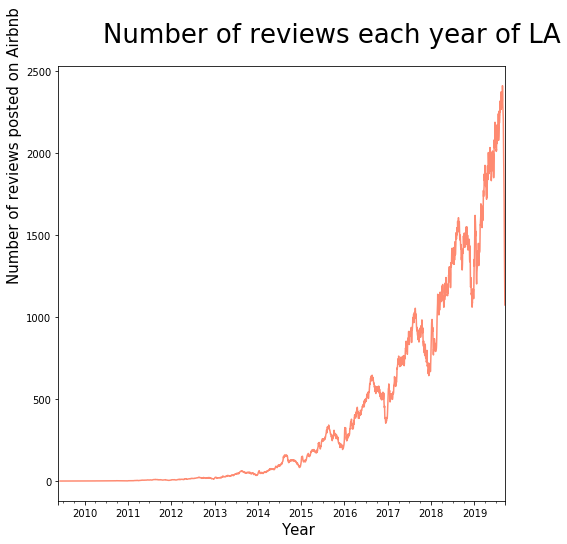

In [5]:
# Your code to answer Question 1
import glob
import json
import time
import calendar
reviews = pd.read_csv("reviews.csv",low_memory=False)
review_count_dates = pd.to_datetime(reviews['date']).value_counts().resample('D').mean().fillna(0)
fig = plt.figure(1, figsize=(8,8))
ax = fig.add_subplot(111)
ax.grid(False)
title='Number of reviews each year of LA'
transparency = 0.5
review_count_dates.rolling(window=15).mean().plot(ax=ax, color='#FE8A71', title = title)

ax.set_title(ax.get_title(), fontsize=26, ha='left')
ax.title.set_position((0.1,1.04))

xlab = 'Year'
ax.set_xlabel(xlab, fontsize=15, ha='left')

ylab = 'Number of reviews posted on Airbnb'
ax.set_ylabel(ylab, fontsize=15, ha='left')

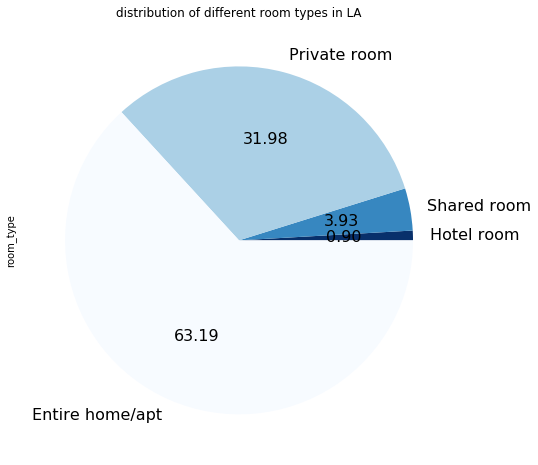

In [6]:
# Your code to answer Question 2
from collections import Counter

listing.fillna(0, inplace=True)
price = listing['price']

room_type = listing.groupby('room_type').id.count()
room_type = room_type.reset_index()
room_type = room_type.rename(columns={'id': 'number_of_listings'})

import matplotlib
import matplotlib.pyplot as plt

room = listing.room_type
r = Counter(room)

room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']

room_df.plot.pie(y = 'room_type', 
                 colormap = 'Blues_r',
                 figsize = (8, 8),
                 fontsize = 16, 
                 autopct = '%.2f',
                 legend = False,
                 title = 'distribution of different room types in LA')

217.7822938881362

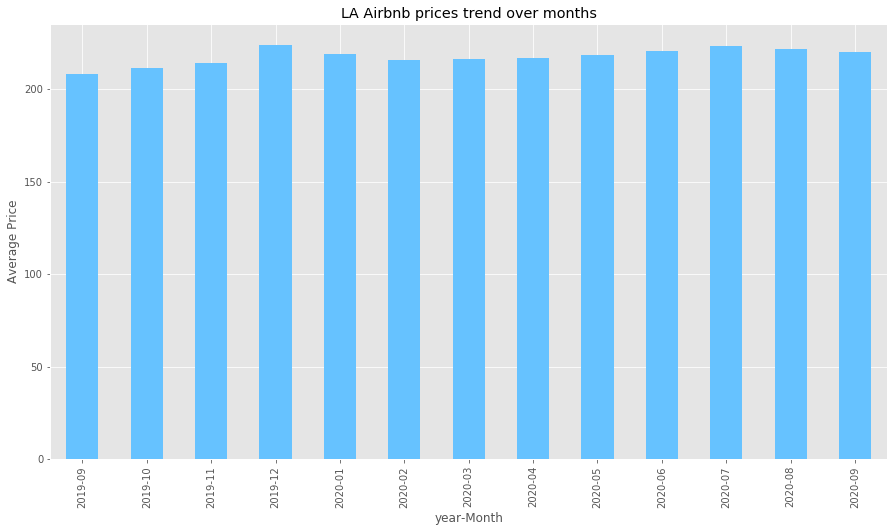

In [8]:
# Your code to answer Question 3
import pandas as pd
import numpy as np
import re
calendar = pd.read_csv("calendar_detail.csv",low_memory=False)
calendar.fillna(0, inplace=True)
calendar = calendar[calendar.price != 0]
price = calendar['price']
prices=[]

for p in price:
    p = re.sub('[^0-9.]+','',p)
    prices.append(float(p))
calendar['price']=prices

calendar = calendar[calendar.price >= 0]

calendar['Year'],calendar['Month'],calendar['Day']=calendar['date'].str.split('-',2).str
year=calendar.groupby(['Year','Month']).price.mean()
year=year.reset_index()
year=year.rename(columns={'price':'average_Price'})
year['year-Month']=year['Year'].map(str) + "-" + year['Month'].map(str)

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

objects = year['year-Month']
y_pos = year['average_Price']
avg = y_pos.mean()
year.plot(kind='bar', 
           x='year-Month',
           y='average_Price',
           color = '#66c2ff', 
           figsize =(15,8), 
           title = 'LA Airbnb prices trend over months', 
           legend = False)
plt.ylabel('Average Price')
avg

   SuperHost Ratings  Number of Reviews
0               88.0          43.425287
1               89.0          49.993300
2               90.0          28.816775
3               91.0          58.968523
4               92.0          61.271488


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a902390>]],
      dtype=object)

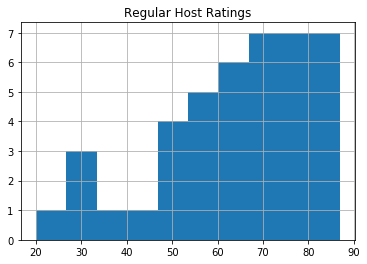

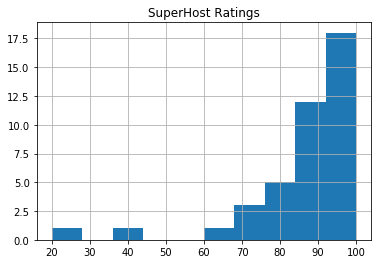

In [4]:
# Your code to answer Question 4
super_data2 = listing_detail[[ 'host_is_superhost','number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value',
       'reviews_per_month']]
super_data2.groupby('host_is_superhost',axis =0).mean()
review_table = pd.DataFrame(data = super_data2.groupby('host_is_superhost',axis =0).mean())

#review_table.drop(['review_scores_checkin', 'review_scores_value','review_scores_location' ,'review_scores_checkin', 'review_scores_accuracy'], axis =1)

review_table.head()
super_data2.groupby(['host_is_superhost','review_scores_rating'],axis =0).mean()
review_table = pd.DataFrame(data=super_data2.groupby(['host_is_superhost','review_scores_rating'],axis =0).mean())

reg_host_ratings = pd.DataFrame(data =list(review_table.index.get_level_values(1)[:42]), columns =['Regular Host Ratings'])
super_host_ratings =pd.DataFrame(data =list(review_table.index.get_level_values(1)[42:]), columns =['SuperHost Ratings'])
                        
#print(reg_host_ratings)
#print(super_host_ratings)

reg_host_number = pd.DataFrame(data =list(review_table['number_of_reviews'][:42]), columns =['Number of Reviews'])
super_host_number = pd.DataFrame(data= list(review_table['number_of_reviews'][42:]),columns =['Number of Reviews'])

reg_table = pd.concat([reg_host_ratings, reg_host_number], axis =1)

super_table = pd.concat([super_host_ratings, super_host_number], axis =1)

print(super_table[0:5])
#print(reg_table)

reg_host_ratings.hist()
super_host_ratings.hist()

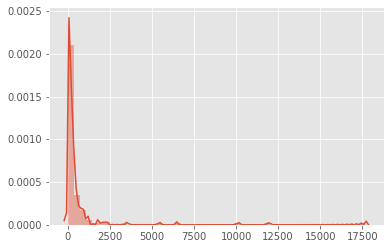

In [10]:
# Your code to answer Question 5
listing['price'] = listing['price'].apply(str).str.replace('$', '0')
listing['price'] = listing['price'].apply(str).str.replace(',', '0')
listing['price'] = listing.price.astype('float')
df1 = listing[["neighbourhood","price"]]
d = df1.groupby("neighbourhood").mean()
sns.distplot(d)
plt.show()

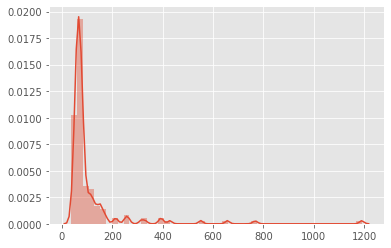

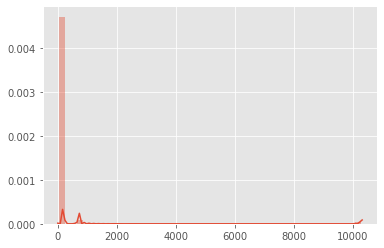

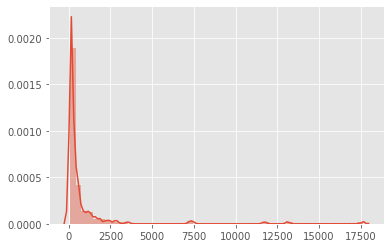

In [11]:
df2 = listing[listing.room_type == "Private room"][["neighbourhood","price"]]
d = df2.groupby("neighbourhood").mean()
sns.distplot(d)
plt.show()
df3 = listing[listing.room_type == 'Shared room'][["neighbourhood","price"]]
d = df3.groupby("neighbourhood").mean()
sns.distplot(d)
plt.show()
df4 = listing[listing.room_type == 'Entire home/apt'][["neighbourhood","price"]]
d = df4.groupby("neighbourhood").mean()
sns.distplot(d)
plt.show()

In [12]:
#price of different room types
#private type
room_1 = listing[listing.room_type == "Private room"][["neighbourhood","price"]]
price_sub1=room_1[['price']]
#shared room
room_2 = listing[listing.room_type == 'Shared room'][["neighbourhood","price"]]
price_sub2=room_2[['price']]
#entire room
room_3 = listing[listing.room_type == 'Entire home/apt'][["neighbourhood","price"]]
price_sub3=room_3[['price']]

price_list_by_n=[price_sub1, price_sub2, price_sub3]

In [13]:
#creating an empty list that we will append later with price distributions for each room type.
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
type_list=["Private room",'Shared room','Entire home/apt']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[1:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':type_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':type_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':type_list[2]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Private room,Shared room,Entire home/apt
Stats,,,
mean,139.211659,126.231769,1069.475411
std,1798.158524,2493.482244,6792.012713
min,0.000000,10.000000,0.000000
25%,50.000000,25.000000,103.000000
50%,65.000000,30.000000,150.000000
75%,89.000000,45.000000,249.000000
max,100000.000000,100000.000000,250000.000000


## Executive Summary
**(You need to use this cell to write your executive summary)**

Executive Summary

(You need to use this cell to write your executive summary)

**Question 1**
Q1 The number of reviews has increased a lot after 2015. So the rewards to encourage consumers to write reviews are very effictive. However, we will find a trend that the number of reviews will drop a lot in the next year which suggests company should invest more in the next year.

**Question 2**
Q2 The majority room type is entire home/apt which accounts for 63.19%. Almost 95% consumers will choose entire home or private room. Piracy is an very important. In conclusion, we suggest Airbnb should invest more in entire home which will cost a lot but win more consumers.

**Question 3**
Q3 The averaging price in LA in the next year will not vary a lot. So we think the pricing strategy should be steady. And by calculating, we suggest the standard reference price should be set to $217.

**Question 4**
Q4 We can find that the number of reviews shows a positive correlation relationship with rating. Besides, superhost title is helpful to gain review in high-rating rooms.

**Question 5**
Q5 The range of price is large. The mean price is higher than 75 percent of prices. It is more reliable to price using price distribution rather than mean price.


